# Connecting and Uploading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/Colab/LLMs Project

[Errno 2] No such file or directory: 'drive/MyDrive/Colab/LLMs Project'
/content/drive/MyDrive/Colab/LLMs Project


In [ ]:
#loading:
import pandas as pd

Dataset      = pd.read_pickle("Dataset_generated_texts_gpt3_09.13.2025.pkl")
Dataset_lora = pd.read_pickle("Dataset_generated_texts_gpt3_lora_09.13.2025.pkl")

In [ ]:
print(Dataset.shape)
Dataset.columns

(25000, 39)


Index(['Taged_Text', 'Label', 'Author', 'Text', 'parse_tree', 'pos',
       'dependency', 'Length', 'Words', 'verb_count', 'adverb_count',
       'noun_count', 'coord_count', 'subord_count', 'verb_percent',
       'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent',
       'longest_path_parstree', 'depth_parstree', 'questions', 'questions_wh',
       'PRP_first', 'PRP_second', 'PRP_third', 'PRP_first_percent',
       'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive',
       'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent',
       'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent'],
      dtype='object')

In [ ]:
print(Dataset_lora.shape)
Dataset_lora.columns

(25000, 39)


Index(['Taged_Text', 'Label', 'Author', 'Text', 'parse_tree', 'pos',
       'dependency', 'Length', 'Words', 'verb_count', 'adverb_count',
       'noun_count', 'coord_count', 'subord_count', 'verb_percent',
       'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent',
       'longest_path_parstree', 'depth_parstree', 'questions', 'questions_wh',
       'PRP_first', 'PRP_second', 'PRP_third', 'PRP_first_percent',
       'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive',
       'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent',
       'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent'],
      dtype='object')

# Running CoreNLP

In [ ]:
#loading:
import pandas as pd

generated_texts_gpt3      = pd.read_csv("generated_texts_gpt3.csv")
generated_texts_gpt3_lora = pd.read_csv("generated_texts_gpt3_lora.csv")

In [ ]:
# Cleaning:

In [ ]:
# 1) Rename "Text" -> "Taged_Text"
generated_texts_gpt3 = generated_texts_gpt3.rename(columns={"Text": "Taged_Text"})

# 2) Create "Label" from the leading <number>
generated_texts_gpt3["Label"] = (
    generated_texts_gpt3["Taged_Text"]
    .str.extract(r'^\s*<\s*(\d+)\s*>')        # grab the number at start like <0>
    .astype("Int64")                           # nullable integer dtype
)

# 3) Map label -> author name
author_map = {
    0: "Charles Dickens",
    1: "Mark Twain",
    2: "Herman Melville",
    3: "Jane Austen",
    4: "Louisa May Alcott",
}
generated_texts_gpt3["Author"] = generated_texts_gpt3["Label"].map(author_map)

# 4) Make a cleaned "Text" column:
#    - remove the leading <number> tag
#    - remove "<end>" and everything after it (case-insensitive)
#    - trim whitespace
generated_texts_gpt3["Text"] = (
    generated_texts_gpt3["Taged_Text"]
    .str.replace(r'^\s*<\s*\d+\s*>\s*', '', regex=True)
    .str.replace(r'\s*<end>.*$', '', regex=True, case=False)
    .str.strip()
)

In [ ]:
# 1) Rename "Text" -> "Taged_Text"
generated_texts_gpt3_lora = generated_texts_gpt3_lora.rename(columns={"Text": "Taged_Text"})

# 2) Create "Label" from the leading <number>
generated_texts_gpt3_lora["Label"] = (
    generated_texts_gpt3_lora["Taged_Text"]
    .str.extract(r'^\s*<\s*(\d+)\s*>')        # grab the number at start like <0>
    .astype("Int64")                           # nullable integer dtype
)

# 3) Map label -> author name
author_map = {
    0: "Charles Dickens",
    1: "Mark Twain",
    2: "Herman Melville",
    3: "Jane Austen",
    4: "Louisa May Alcott",
}
generated_texts_gpt3_lora["Author"] = generated_texts_gpt3_lora["Label"].map(author_map)

# 4) Make a cleaned "Text" column:
#    - remove the leading <number> tag
#    - remove "<end>" and everything after it (case-insensitive)
#    - trim whitespace
generated_texts_gpt3_lora["Text"] = (
    generated_texts_gpt3_lora["Taged_Text"]
    .str.replace(r'^\s*<\s*\d+\s*>\s*', '', regex=True)
    .str.replace(r'\s*<end>.*$', '', regex=True, case=False)
    .str.strip()
)

In [ ]:
# https://colab.research.google.com/github/stanfordnlp/stanza/blob/master/demo/Stanza_CoreNLP_Interface.ipynb#scrollTo=WP4Dz6PIJHeL

In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 49.0 MB/s eta 0:00:00


In [ ]:
import stanza

In [ ]:
rm -rf corenlp

In [ ]:
# Download the Stanford CoreNLP package with Stanza's installation command
corenlp_dir = './corenlp'
stanza.install_corenlp(dir=corenlp_dir)

INFO:stanza:Installing CoreNLP package into ./corenlp


INFO:stanza:Downloaded file to ./corenlp/corenlp.zip


In [ ]:
# Set the CORENLP_HOME environment variable to point to the installation location
import os
os.environ["CORENLP_HOME"] = corenlp_dir

In [ ]:
!ls $CORENLP_HOME

build.xml				  jollyday.jar
corenlp.sh				  LIBRARY-LICENSES
CoreNLP-to-HTML.xsl			  LICENSE.txt
ejml-core-0.39.jar			  Makefile
ejml-core-0.39-sources.jar		  pom-java-11.xml
ejml-ddense-0.39.jar			  pom-java-17.xml
ejml-ddense-0.39-sources.jar		  pom.xml
ejml-simple-0.39.jar			  protobuf-java-3.25.5.jar
ejml-simple-0.39-sources.jar		  protobuf-java-3.25.5-sources.jar
input.txt				  README.txt
input.txt.out				  RESOURCE-LICENSES
input.txt.xml				  sample-project-pom.xml
istack-commons-runtime-3.0.7.jar	  SemgrexDemo.java
istack-commons-runtime-3.0.7-sources.jar  ShiftReduceDemo.java
jakarta.json-1.1.6.jar			  slf4j-api.jar
jakarta.json-1.1.6-sources.jar		  slf4j-simple.jar
jakarta.servlet-api-4.0.4.jar		  stanford-corenlp-4.5.10.jar
jakarta.servlet-api-4.0.4-sources.jar	  stanford-corenlp-4.5.10-javadoc.jar
javax.activation-api-1.2.0.jar		  stanford-corenlp-4.5.10-models.jar
javax.activation-api-1.2.0-sources.jar	  stanford-corenlp-4.5.10-sources.jar
jaxb-api-2.4.0-b180830.0359.jar		 

In [ ]:
!export CORENLP_HOME=path_to_corenlp_dir

In [ ]:
# Import client module
from stanza.server import CoreNLPClient

In [ ]:
# Construct a CoreNLPClient with some basic annotators, a memory allocation of 4GB, and port number 9001
client = CoreNLPClient(
    timeout=70000,
    #annotators=['tokenize','ssplit', 'pos', 'lemma', 'ner'],
    annotators=['tokenize','ssplit','pos','lemma','ner', 'parse', 'depparse','coref'],
    memory='4G',
    endpoint='http://localhost:9001',
    be_quiet=True)
print(client)

INFO:stanza:Writing properties to tmp file: corenlp_server-efbc07119d0a4d3c.props


In [ ]:
# Start the background server and wait for some time
# Note that in practice this is totally optional, as by default the server will be started when the first annotation is performed
client.start()
import time; time.sleep(10)

INFO:stanza:Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 70000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-efbc07119d0a4d3c.props -annotators tokenize,ssplit,pos,lemma,ner,parse,depparse,coref -preload -outputFormat serialized


In [ ]:
# Print background processes and look for java
!ps -o pid,cmd | grep java

   4733 java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 70000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-efbc07119d0a4d3c.props -annotators tokenize,ssplit,pos,lemma,ner,parse,depparse,coref -preload -outputFormat serialized
   4828 /bin/bash -c ps -o pid,cmd | grep java
   4830 grep java


In [ ]:
# CorNLP on dataset:

#generated_texts_gpt3

text_sentences_gpt3 = generated_texts_gpt3['Text'].tolist()

text_sentences_gpt3_pared = []
index_of_error_gpt3 = []

print("Total number of Samples:", len(generated_texts_gpt3))

for i in range(len(text_sentences_gpt3)):
  try:
    if i % 1000 == 0:
        print(i)
    document = client.annotate(text_sentences_gpt3[i])
    text_sentences_gpt3_pared.append(document)
  except:
    index_of_error_gpt3.append(i)
    text_sentences_gpt3_pared.append(i)

text_sentences_lora_pared = []
index_of_error_lora = []

Total number of Samples: 25000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


In [ ]:
#generated_texts_gpt3_lora

text_sentences_gpt3_lora = generated_texts_gpt3_lora['Text'].tolist()

text_sentences_gpt3_lora_pared = []
index_of_error_gpt3_lora = []

print("Total number of Samples:", len(generated_texts_gpt3_lora))

for i in range(len(text_sentences_gpt3_lora)):
  try:
    if i % 1000 == 0:
        print(i)
    document = client.annotate(text_sentences_gpt3_lora[i])
    text_sentences_gpt3_lora_pared.append(document)
  except:
    text_sentences_gpt3_lora_pared.append(i)
    index_of_error_gpt3_lora.append(i)

Total number of Samples: 25000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


In [ ]:
# Removing errors:

print(index_of_error_gpt3)
print(index_of_error_gpt3_lora)

[]
[]


In [ ]:
# Remove from Dataset:
generated_texts_gpt3 = generated_texts_gpt3.drop(index=index_of_error_gpt3)
generated_texts_gpt3.reset_index(drop=True, inplace=True)

generated_texts_gpt3_lora = generated_texts_gpt3_lora.drop(index=index_of_error_gpt3_lora)
generated_texts_gpt3_lora.reset_index(drop=True, inplace=True)

In [ ]:
# Remove the elements with biger index first:

index_of_error_gpt3.reverse()
index_of_error_gpt3_lora.reverse()

In [ ]:
print(index_of_error_gpt3)
print(index_of_error_gpt3_lora)

[]
[]


In [ ]:
for x in index_of_error_gpt3:
  del text_sentences_gpt3_pared[x]

In [ ]:
for x in index_of_error_gpt3_lora:
  del text_sentences_gpt3_lora_pared[x]

In [ ]:
# Adding CoreNLP to Dataset:

for i in range(len(generated_texts_gpt3)):
    generated_texts_gpt3.loc[i, 'parse_tree'] = str(text_sentences_gpt3_pared[i].sentence[0].parseTree)
    generated_texts_gpt3.loc[i, 'pos']        = str([t.pos for t in text_sentences_gpt3_pared[i].sentence[0].token])
    generated_texts_gpt3.loc[i, 'dependency'] = text_sentences_gpt3_pared[i].sentence[0].enhancedPlusPlusDependencies.edge


for i in range(len(generated_texts_gpt3_lora)):
    generated_texts_gpt3_lora.loc[i, 'parse_tree'] = str(text_sentences_gpt3_lora_pared[i].sentence[0].parseTree)
    generated_texts_gpt3_lora.loc[i, 'pos']        = str([t.pos for t in text_sentences_gpt3_lora_pared[i].sentence[0].token])
    generated_texts_gpt3_lora.loc[i, 'dependency'] = text_sentences_gpt3_lora_pared[i].sentence[0].enhancedPlusPlusDependencies.edge

In [ ]:
generated_texts_gpt3.head(1)

,Taged_Text,Label,Author,Text,parse_tree,pos,dependency
0,<0> It is not my object to enlarge upon her gr...,0,Charles Dickens,"It is not my object to enlarge upon her grief,...",child {\n child {\n child {\n child {...,"['PRP', 'VBZ', 'RB', 'PRP$', 'NN', 'IN', 'VB',...","[source: 5\ntarget: 1\ndep: ""nsubj""\nisExtra: ..."


In [ ]:
generated_texts_gpt3_lora.head(1)

,Taged_Text,Label,Author,Text,parse_tree,pos,dependency
0,<0> It’s quite a question.’ It was a question ...,0,Charles Dickens,It’s quite a question.’ It was a question whet...,child {\n child {\n child {\n child {...,"['PRP', 'POS', 'PDT', 'DT', 'NN', '.', ""''""]","[source: 5\ntarget: 1\ndep: ""nsubj""\nisExtra: ..."


In [ ]:
# "pos"           string --> list
# "dependency"    string --> list of dictionary

In [ ]:
import ast

generated_texts_gpt3["pos"] = generated_texts_gpt3["pos"].apply(lambda x: ast.literal_eval(x))
generated_texts_gpt3_lora["pos"] = generated_texts_gpt3_lora["pos"].apply(lambda x: ast.literal_eval(x))

In [ ]:
import re
import pandas as pd

def parse_dependency(dep_str):
    """
    Convert a dependency string into a list of dictionaries.
    """
    if pd.isna(dep_str) or not isinstance(dep_str, str):
        return []

    # Remove outer square brackets if present
    dep_str = dep_str.strip().lstrip("[").rstrip("]")

    # Split into blocks by ', source:' while keeping the first 'source:'
    parts = re.split(r',\s*source:', dep_str)
    parts = [p if p.strip().startswith("source:") else "source: " + p.strip() for p in parts]

    dep_list = []
    for block in parts:
        entry = {}
        # Match key: value (handles quoted strings)
        matches = re.findall(r'(\w+):\s*("?[^"\n]+"?|\w+)', block)
        for k, v in matches:
            v = v.strip('"')
            # Convert booleans and ints
            if v.lower() == "true":
                v = True
            elif v.lower() == "false":
                v = False
            else:
                try:
                    v = int(v)
                except ValueError:
                    pass
            entry[k] = v
        if entry:
            dep_list.append(entry)

    return dep_list


In [ ]:
generated_texts_gpt3["dependency"] = generated_texts_gpt3["dependency"].astype(str)   # or convert to dict/JSON if you have a better serializer
generated_texts_gpt3_lora["dependency"] = generated_texts_gpt3_lora["dependency"].astype(str)   # or convert to dict/JSON if you have a better serializer

In [ ]:
generated_texts_gpt3["dependency"] = generated_texts_gpt3["dependency"].apply(lambda x: parse_dependency(x))
generated_texts_gpt3_lora["dependency"] = generated_texts_gpt3_lora["dependency"].apply(lambda x: parse_dependency(x))

In [ ]:
# Saving

In [ ]:
generated_texts_gpt3.to_pickle("generated_texts_gpt3_09.13.2025.pkl")
generated_texts_gpt3_lora.to_pickle("generated_texts_gpt3_lora_09.13.2025.pkl")

In [ ]:
print("Saved (^_^)")

Saved (^_^)


In [ ]:
# Shut down the background CoreNLP server
client.stop()

time.sleep(10)
!ps -o pid,cmd | grep java

# Features (Paper 1)

In [ ]:
Dataset = generated_texts_gpt3.copy()

In [ ]:
Dataset_lora = generated_texts_gpt3_lora.copy()

In [ ]:
sentences_len = []
sentences_words = []

for sentence in Dataset["Text"]:
        sentences_len.append(len(sentence))
        sentences_words.append(len(sentence.split()))

# Add as new columns to the existing DataFrame
Dataset["Length"] = sentences_len
Dataset["Words"] = sentences_words

In [ ]:
sentences_len = []
sentences_words = []

for sentence in Dataset_lora["Text"]:
        sentences_len.append(len(sentence))
        sentences_words.append(len(sentence.split()))

# Add as new columns to the existing DataFrame
Dataset_lora["Length"] = sentences_len
Dataset_lora["Words"] = sentences_words

In [ ]:
Dataset.head(1)

,Taged_Text,Label,Author,Text,parse_tree,pos,dependency,Length,Words
0,<0> It is not my object to enlarge upon her gr...,0,Charles Dickens,"It is not my object to enlarge upon her grief,...",child {\n child {\n child {\n child {...,"[PRP, VBZ, RB, PRP$, NN, IN, VB, IN, PRP$, NN,...","[{'source': 5, 'target': 1, 'dep': 'nsubj', 'i...",73,15


In [ ]:
Dataset_lora.head(1)

,Taged_Text,Label,Author,Text,parse_tree,pos,dependency,Length,Words
0,<0> It’s quite a question.’ It was a question ...,0,Charles Dickens,It’s quite a question.’ It was a question whet...,child {\n child {\n child {\n child {...,"[PRP, POS, PDT, DT, NN, ., '']","[{'source': 5, 'target': 1, 'dep': 'nsubj', 'i...",174,34


## Part of Speech

In [ ]:
for i in range(len(Dataset)):

    tokens = Dataset.loc[i, "pos"]

    Dataset.at[i, 'verb_count']   = sum(1 for t in tokens if t.startswith('V'))
    Dataset.at[i, 'adverb_count'] = sum(1 for t in tokens if t.startswith('RB'))
    Dataset.at[i, 'noun_count']   = sum(1 for t in tokens if t.startswith('N'))
    Dataset.at[i, 'coord_count']  = sum(1 for t in tokens if t.startswith('CC'))
    Dataset.at[i, 'subord_count'] = sum(1 for t in tokens if t.startswith('IN'))

Dataset['verb_percent']        =  round(Dataset['verb_count']/Dataset['Words'], 2)
Dataset['adverb_percent']      =  round(Dataset['adverb_count']/Dataset['Words'], 2)
Dataset['noun_percent']        =  round(Dataset['noun_count']/Dataset['Words'], 2)
Dataset['coord_percent']  =  round(Dataset['coord_count']/Dataset['Words'], 2)
Dataset['subord_percent'] =  round(Dataset['subord_count']/Dataset['Words'], 2)

del i, tokens

In [ ]:
for i in range(len(Dataset_lora)):

    tokens = Dataset_lora.loc[i, "pos"]

    Dataset_lora.at[i, 'verb_count']   = sum(1 for t in tokens if t.startswith('V'))
    Dataset_lora.at[i, 'adverb_count'] = sum(1 for t in tokens if t.startswith('RB'))
    Dataset_lora.at[i, 'noun_count']   = sum(1 for t in tokens if t.startswith('N'))
    Dataset_lora.at[i, 'coord_count']  = sum(1 for t in tokens if t.startswith('CC'))
    Dataset_lora.at[i, 'subord_count'] = sum(1 for t in tokens if t.startswith('IN'))

Dataset_lora['verb_percent']        =  round(Dataset_lora['verb_count']/Dataset_lora['Words'], 2)
Dataset_lora['adverb_percent']      =  round(Dataset_lora['adverb_count']/Dataset_lora['Words'], 2)
Dataset_lora['noun_percent']        =  round(Dataset_lora['noun_count']/Dataset_lora['Words'], 2)
Dataset_lora['coord_percent']  =  round(Dataset_lora['coord_count']/Dataset_lora['Words'], 2)
Dataset_lora['subord_percent'] =  round(Dataset_lora['subord_count']/Dataset_lora['Words'], 2)

del i, tokens

## Path and Depth

In [ ]:
# Calculate the longest path between two leaves in the tree.

def longest_path(node):

    if not node.get("children"):
        # Leaf node, no children
        return 0, 0

    max_depth = 0
    second_max_depth = 0
    max_path = 0

    for child in node["children"]:
        path, depth = longest_path(child)
        if depth > max_depth:
            second_max_depth = max_depth
            max_depth = depth
        elif depth > second_max_depth:
            second_max_depth = depth

        max_path = max(max_path, path)

    # Longest path through this node
    longest_through_root = max_depth + second_max_depth + 2

    return max(max_path, longest_through_root), max_depth + 1


def tree_depth(node):
    """
    Calculate the depth of the tree.
    """
    if not node.get("children"):
        # Leaf node, no children
        return 1

    return 1 + max(tree_depth(child) for child in node["children"])


import re

def build_tree(data):
    """
    Build a tree from the string representation.
    """
    # Split the data into lines
    lines = data.split('\n')

    # Create a root node
    tree = {"children": []}
    current_node = tree
    stack = []

    # Regex pattern to identify node attributes
    pattern = re.compile(r'(value|score): "?(.*?)"?\s*$')

    for line in lines:
        line = line.strip()
        if line.startswith("child {"):
            # Start a new child node
            new_node = {"children": []}
            if current_node is not None:
                current_node["children"].append(new_node)
            stack.append(current_node)
            current_node = new_node
        elif line == "}":
            # End of the current node, pop from stack
            current_node = stack.pop()
        else:
            # Extract attributes
            match = pattern.search(line)
            if match:
                current_node[match.group(1)] = match.group(2)

    return tree["children"][0]

In [ ]:
def longest_path_and_depth(node):
    data = str(node)
    tree = build_tree(data)
    longest_path_length, _ = longest_path(tree)
    depth = tree_depth(tree)

    return longest_path_length, depth

In [ ]:
Dataset['longest_path_parstree'], Dataset['depth_parstree'] = zip(*Dataset['parse_tree'].apply(longest_path_and_depth))

In [ ]:
Dataset_lora['longest_path_parstree'], Dataset_lora['depth_parstree'] = zip(*Dataset_lora['parse_tree'].apply(longest_path_and_depth))

## Questions

In [ ]:
def questions (node):
    S_question    = 1 if "value: \"SQ\""    in str(node) else 0
    S_question_wh = 1 if "value: \"SBARQ\"" in str(node) else 0
    return S_question, S_question_wh

In [ ]:
Dataset['questions'], Dataset['questions_wh'] = zip(*Dataset['parse_tree'].apply(questions))

In [ ]:
Dataset_lora['questions'], Dataset_lora['questions_wh'] = zip(*Dataset_lora['parse_tree'].apply(questions))

## Pronouns

In [ ]:
def pronouns  (node):
    PRP_first  = node.lower().count("value: \"i\"") + node.lower().count("value: \"we\"")
    PRP_second = node.lower().count("value: \"you\"")
    PRP_third  = node.lower().count("value: \"he\"") + node.lower().count("value: \"she\"") + node.lower().count("value: \"it\"") + node.lower().count("value: \"they\"")

    return PRP_first, PRP_second, PRP_third

In [ ]:
Dataset['PRP_first'], Dataset['PRP_second'], Dataset['PRP_third'] = zip(*Dataset['parse_tree'].apply(pronouns))

In [ ]:
Dataset_lora['PRP_first'], Dataset_lora['PRP_second'], Dataset_lora['PRP_third'] = zip(*Dataset_lora['parse_tree'].apply(pronouns))

In [ ]:
Dataset['PRP_first_percent']   =  round(Dataset['PRP_first']/Dataset['Words'], 2)
Dataset['PRP_second_percent']  =  round(Dataset['PRP_second']/Dataset['Words'], 2)
Dataset['PRP_third_percent']   =  round(Dataset['PRP_third']/Dataset['Words'], 2)

In [ ]:
Dataset_lora['PRP_first_percent']   =  round(Dataset_lora['PRP_first']/Dataset_lora['Words'], 2)
Dataset_lora['PRP_second_percent']  =  round(Dataset_lora['PRP_second']/Dataset_lora['Words'], 2)
Dataset_lora['PRP_third_percent']   =  round(Dataset_lora['PRP_third']/Dataset_lora['Words'], 2)

## phrases

In [ ]:
def phrases (node):
    S_noun       = node.count("value: \"NP\"")
    S_quantifier = node.count("value: \"QP\"")
    return S_noun, S_quantifier

In [ ]:
Dataset['noun_phrase'], Dataset['quantifier_phrase'] = zip(*Dataset['parse_tree'].apply(phrases))

In [ ]:
Dataset_lora['noun_phrase'], Dataset_lora['quantifier_phrase'] = zip(*Dataset_lora['parse_tree'].apply(phrases))

In [ ]:
# Droping quantifier_phrase
Dataset.drop(columns=['quantifier_phrase'], inplace=True)

In [ ]:
# Droping quantifier_phrase
Dataset_lora.drop(columns=['quantifier_phrase'], inplace=True)

# Features (Paper 2)

#### Number of Words

In [ ]:
Dataset['Words'] = Dataset['pos'].apply(lambda x: len(x))

In [ ]:
Dataset_lora['Words'] = Dataset_lora['pos'].apply(lambda x: len(x))

#### 1. Passive Sentences

In [ ]:
import spacy

# Load the language model
nlp = spacy.load('en_core_web_sm')

In [ ]:
import pandas as pd

def is_passive(sentence):
    # Parse the sentence using SpaCy
    doc = nlp(sentence)

    # Check for passive voice
    for token in doc:
        if token.dep_ == "auxpass":
            return True
    return False


def is_agentless_passive(sentence):
    doc = nlp(sentence)
    has_auxpass = False
    has_agent = False

    for token in doc:
        if token.dep_ == "auxpass":
            has_auxpass = True
        if token.dep_ == "agent":
            has_agent = True

    # Check for passive voice and absence of an agent
    return has_auxpass and not has_agent

In [ ]:
def passive_detector(sentence):
    if is_agentless_passive(sentence):
        return "Agentless Passive"
    elif is_passive(sentence):
        return "Passive"
    else:
        return "Active"

In [ ]:
# Apply the function on the 'Sentence' column
Dataset.loc[:, 'Passive'] = Dataset['Text'].apply(passive_detector)

In [ ]:
# Apply the function on the 'Sentence' column
Dataset_lora.loc[:, 'Passive'] = Dataset_lora['Text'].apply(passive_detector)

In [ ]:
Dataset.groupby('Label')['Passive'].value_counts()

Label  Passive          
0      Active               4322
       Agentless Passive     596
       Passive                82
1      Active               4088
       Agentless Passive     804
       Passive               108
2      Active               4322
       Agentless Passive     610
       Passive                68
3      Active               4408
       Agentless Passive     536
       Passive                56
4      Active               4138
       Agentless Passive     742
       Passive               120
Name: count, dtype: int64

In [ ]:
Dataset_lora.groupby('Label')['Passive'].value_counts()

Label  Passive          
0      Active               4368
       Agentless Passive     579
       Passive                53
1      Active               4233
       Agentless Passive     692
       Passive                75
2      Active               4457
       Agentless Passive     494
       Passive                49
3      Active               4401
       Agentless Passive     554
       Passive                45
4      Active               4252
       Agentless Passive     672
       Passive                76
Name: count, dtype: int64

#### 2. Comparative & Superlative

In [ ]:
import re

def parse_tree_structure(tree_string):
    # Function to convert the custom tree structure to a dictionary
    def parse_node(text):
        stack = []
        current_node = {}
        current_key = None
        current_value = None

        for token in re.finditer(r'(\w+)|[{}]', text):
            if token.group() == '{':
                stack.append((current_node, current_key))
                current_node = {}
                current_key = None
            elif token.group() == '}':
                if current_key:
                    current_node[current_key] = current_value
                if stack:
                    parent_node, parent_key = stack.pop()
                    if parent_key not in parent_node:
                        parent_node[parent_key] = []
                    parent_node[parent_key].append(current_node)
                    current_node = parent_node
                    current_key = None
            else:
                if current_key is None:
                    current_key = token.group()
                else:
                    current_value = token.group()
                    current_node[current_key] = current_value
                    current_key = None
                    current_value = None

        return current_node

    return parse_node(tree_string)



def Comparative_Superlative(tree_string):

    # Parse the string representation of the tree into a dictionary
    tree_dict = parse_tree_structure(tree_string)

    stack = [tree_dict]

    while stack:
        current = stack.pop()

        if isinstance(current, dict):
            for key, value in current.items():
                if key == 'value' and (value == 'JJR' or value == 'RBR'):
                    return "Comparative"
                if key == 'value' and (value == 'JJS' or value == 'RBS'):
                    return "Superlative"
                if key == 'child':
                    stack.extend(value)

    return "Not"

In [ ]:
# Apply the function on the 'Sentence' column
Dataset.loc[:, 'Compare_Super'] = Dataset['parse_tree'].apply(Comparative_Superlative)

In [ ]:
# Apply the function on the 'Sentence' column
Dataset_lora.loc[:, 'Compare_Super'] = Dataset_lora['parse_tree'].apply(Comparative_Superlative)

In [ ]:
Dataset.groupby('Label')['Compare_Super'].value_counts()

Label  Compare_Super
0      Not              4576
       Comparative       270
       Superlative       154
1      Not              4257
       Comparative       427
       Superlative       316
2      Not              4583
       Comparative       224
       Superlative       193
3      Not              4394
       Comparative       328
       Superlative       278
4      Not              4363
       Superlative       334
       Comparative       303
Name: count, dtype: int64

In [ ]:
Dataset_lora.groupby('Label')['Compare_Super'].value_counts()

Label  Compare_Super
0      Not              4496
       Comparative       280
       Superlative       224
1      Not              4302
       Comparative       409
       Superlative       289
2      Not              4529
       Comparative       275
       Superlative       196
3      Not              4354
       Comparative       344
       Superlative       302
4      Not              4275
       Superlative       387
       Comparative       338
Name: count, dtype: int64

#### 3. Search for CONJP

In [ ]:
import pandas as pd
import json

# Function to check if 'CONJP' exists in the 'parsstree' JSON
def contains_conjp(json_str):
    try:
        # Check if 'CONJP' is present in the values of the JSON structure
        return 'CONJP' in json_str
    except json.JSONDecodeError:
        return False


In [ ]:
# Apply the function to the 'parsstree' column
Dataset.loc[:, 'CONJP'] = Dataset['parse_tree'].apply(contains_conjp)

In [ ]:
Dataset_lora.loc[:, 'CONJP'] = Dataset_lora['parse_tree'].apply(contains_conjp)

In [ ]:
Dataset.groupby('Label')['CONJP'].value_counts()

Label  CONJP
0      False    4960
       True       40
1      False    4950
       True       50
2      False    4964
       True       36
3      False    4928
       True       72
4      False    4931
       True       69
Name: count, dtype: int64

In [ ]:
Dataset_lora.groupby('Label')['CONJP'].value_counts()

Label  CONJP
0      False    4959
       True       41
1      False    4939
       True       61
2      False    4965
       True       35
3      False    4927
       True       73
4      False    4918
       True       82
Name: count, dtype: int64

#### 4. Imperative Sentences

In [ ]:
#!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 120.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import ast

def imperative_detector(pos):
    if pos[0] == "VB" and pos[-1] == ".":
        return True
    return False

In [ ]:
# Apply the function to the 'parsstree' column
Dataset.loc[:, 'Imperative'] = Dataset['pos'].apply(imperative_detector)

In [ ]:
Dataset_lora.loc[:, 'Imperative'] = Dataset_lora['pos'].apply(imperative_detector)

In [ ]:
Dataset['Imperative'].value_counts()

,count
Imperative,
False,24502
True,498


In [ ]:
Dataset_lora['Imperative'].value_counts()

,count
Imperative,
False,24560
True,440


#### 5. Nominal Subject

In [ ]:
'''import spacy

def Nsubj(sentence):

    doc = client.annotate(sentence)
    edges = doc.sentence[0].enhancedPlusPlusDependencies.edge


    # 0 -> There is not a nsubj
    # 1 -> nsubj is pronoun
    # 2 -> nsubj is noun

    for edge in edges:
        if edge.dep == "nsubj":
            index = edge.target - 1
            if doc.sentence[0].token[index].pos == "PRP":
                return 1 #pronoun
            else:
                return 2 #noun
    return 0 #not'''
pass

In [ ]:
'''# Apply the function to the 'sentence' column
Dataset.loc[:, 'Nsubj'] = Dataset['Sentence'].apply(Nsubj)'''
pass

In [ ]:
import spacy

def Nsubj(deps_list, pos):
    print(len(deps_list))

    # 0 -> There is not a nsubj
    # 1 -> nsubj is pronoun
    # 2 -> nsubj is noun

    if len(pos) == 1:
        return 0

    for dep_info in deps_list:
        if dep_info["dep"] == "nsubj":
            index = dep_info["target"] - 1
            if pos[index] == "PRP":
                return 1 #pronoun
            else:
                return 2 #noun
    return 0 #not

In [ ]:
Dataset["Nsubj"] = Dataset.apply(lambda row: Nsubj(row["dependency"], row["pos"]), axis=1)
Dataset_lora["Nsubj"] = Dataset_lora.apply(lambda row: Nsubj(row["dependency"], row["pos"]), axis=1)

In [ ]:
Dataset['Nsubj'] = Dataset['Nsubj'].astype(int)

In [ ]:
Dataset_lora['Nsubj'] = Dataset_lora['Nsubj'].astype(int)

In [ ]:
Dataset.groupby('Label')['Nsubj'].value_counts()

Label  Nsubj
0      1        2381
       2        1804
       0         815
1      1        2586
       2        1805
       0         609
2      2        2157
       1        2085
       0         758
3      1        2532
       2        2010
       0         458
4      1        2267
       2        2016
       0         717
Name: count, dtype: int64

In [ ]:
Dataset_lora.groupby('Label')['Nsubj'].value_counts()

Label  Nsubj
0      1        2251
       2        2018
       0         731
1      1        2501
       2        1825
       0         674
2      2        2189
       1        2160
       0         651
3      2        2408
       1        2160
       0         432
4      1        2378
       2        1867
       0         755
Name: count, dtype: int64

#### Prepositional Phrase

In [ ]:
import re

# Function to convert the custom tree structure to a dictionary

def parse_tree_structure(tree_string):
    stack = []
    current_node = {}
    current_key = None
    current_value = None

    for token in re.finditer(r'(\w+)|[{}]', tree_string):
        if token.group() == '{':
            stack.append((current_node, current_key))
            current_node = {}
            current_key = None
        elif token.group() == '}':
            if current_key:
                current_node[current_key] = current_value
            if stack:
                parent_node, parent_key = stack.pop()
                if parent_key not in parent_node:
                    parent_node[parent_key] = []
                parent_node[parent_key].append(current_node)
                current_node = parent_node
                current_key = None
        else:
            if current_key is None:
                current_key = token.group()
            else:
                current_value = token.group()
                current_node[current_key] = current_value
                current_key = None
                current_value = None
    return current_node

In [ ]:
def find_leaves_with_pp_ancestor(tree, parent_has_pp=False):
    leaves = []

    # Check if the current node has 'value': 'PP'
    if tree.get('value') == 'PP':
        parent_has_pp = True

    # If this node has children, recurse
    if 'child' in tree and isinstance(tree['child'], list):
        for child in tree['child']:
            leaves.extend(find_leaves_with_pp_ancestor(child, parent_has_pp))
    else:
        # If this is a leaf node and its parent or ancestor had 'value': 'PP'
        if (parent_has_pp and tree.get('value') is not None) and (parent_has_pp and tree.get('value') != '342'):
            leaves.append(tree.get('value'))

    return leaves

In [ ]:
def percentage_of_PP(tree_string,words):
    dic_tree = parse_tree_structure(tree_string)
    list_of_pp = find_leaves_with_pp_ancestor(dic_tree)

    return round(len(list_of_pp)/words, 2)

In [ ]:
# Runing on the all of Samples:

Dataset['PP_Percent'] = 0.0

for i in range(len(Dataset)):
    percent = percentage_of_PP(Dataset.loc[i]['parse_tree'], Dataset.loc[i]['Words'])
    Dataset.loc[i, 'PP_Percent'] = percent

In [ ]:
# Runing on the all of Samples:

Dataset_lora['PP_Percent'] = 0.0

for i in range(len(Dataset_lora)):
    percent = percentage_of_PP(Dataset_lora.loc[i]['parse_tree'], Dataset_lora.loc[i]['Words'])
    Dataset_lora.loc[i, 'PP_Percent'] = percent

In [ ]:
# Checking the reults:
smaler_than_0 = Dataset[Dataset['PP_Percent'] < 0].index
bigger_than_1 = Dataset[Dataset['PP_Percent'] > 1].index

print(len(smaler_than_0), len(bigger_than_1))

0 0


In [ ]:
# Checking the reults:
smaler_than_0 = Dataset_lora[Dataset_lora['PP_Percent'] < 0].index
bigger_than_1 = Dataset_lora[Dataset_lora['PP_Percent'] > 1].index

print(len(smaler_than_0), len(bigger_than_1))

0 0


In [ ]:
# Function to find words based on the type of parent node
def find_leaves_with_pp_parent_type(tree, parent_tag=None, parent_of_pp=None):
    leaves_vp = []
    leaves_np = []
    leaves_other = []

    # Check if the current node has 'value': 'PP'
    if tree.get('value') == 'PP':
        parent_of_pp = parent_tag

    # If this node has children, recurse
    if 'child' in tree and isinstance(tree['child'], list):
        for child in tree['child']:
            vp, np, other = find_leaves_with_pp_parent_type(child, tree.get('value'), parent_of_pp)
            leaves_vp.extend(vp)
            leaves_np.extend(np)
            leaves_other.extend(other)
    else:
        # If this is a leaf node and its parent or ancestor had 'value': 'PP'
        if parent_of_pp == 'VP' and tree.get('value') is not None and tree.get('value') != '342':
            leaves_vp.append(tree.get('value'))
        elif parent_of_pp == 'NP' and tree.get('value') is not None and tree.get('value') != '342':
            leaves_np.append(tree.get('value'))
        elif parent_of_pp is not None and tree.get('value') is not None and tree.get('value') != '342':
            leaves_other.append(tree.get('value'))

    return leaves_vp, leaves_np, leaves_other

In [ ]:
# Example usage:
sample = 0

leaves_vp, leaves_np, leaves_other = find_leaves_with_pp_parent_type(parse_tree_structure(Dataset.loc[sample]["parse_tree"]))

print("Leaves with PP parent under VP:", leaves_vp)
print("Leaves with PP parent under NP:", leaves_np)
print("Leaves with PP parent under other:", leaves_other)

Leaves with PP parent under VP: ['to', 'enlarge', 'upon', 'her', 'grief', 'or', 'allude', 'to', 'her', 'reproach']
Leaves with PP parent under NP: []
Leaves with PP parent under other: []


In [ ]:
def percentage_of_PP_for_VP_NP_Other(tree_string,words):
    dic_tree = parse_tree_structure(tree_string)
    leaves_vp, leaves_np, leaves_other = find_leaves_with_pp_parent_type(dic_tree)

    return round(len(leaves_vp)/words, 2), round(len(leaves_np)/words, 2), round(len(leaves_other)/words, 2)

In [ ]:
percentage_of_PP_for_VP_NP_Other(Dataset.loc[sample]["parse_tree"],Dataset.loc[sample]["Words"])

(np.float64(0.59), np.float64(0.0), np.float64(0.0))

In [ ]:
percentage_of_PP_for_VP_NP_Other(Dataset_lora.loc[sample]["parse_tree"],Dataset_lora.loc[sample]["Words"])

(np.float64(0.0), np.float64(0.0), np.float64(0.0))

In [ ]:
# Runing on the all of Samples:

Dataset['PP_VP_Percent'] = 0.0
Dataset['PP_NP_Percent'] = 0.0
Dataset['PP_O_Percent'] = 0.0

for i in range(len(Dataset)):
    pp_vp_percent, pp_np_percent, pp_other_percent = percentage_of_PP_for_VP_NP_Other(Dataset.loc[i]['parse_tree'], Dataset.loc[i]['Words'])
    Dataset.loc[i, 'PP_VP_Percent'] = pp_vp_percent
    Dataset.loc[i, 'PP_NP_Percent'] = pp_np_percent
    Dataset.loc[i, 'PP_O_Percent']  = pp_other_percent

In [ ]:
# Runing on the all of Samples:

Dataset_lora['PP_VP_Percent'] = 0.0
Dataset_lora['PP_NP_Percent'] = 0.0
Dataset_lora['PP_O_Percent'] = 0.0

for i in range(len(Dataset_lora)):
    pp_vp_percent, pp_np_percent, pp_other_percent = percentage_of_PP_for_VP_NP_Other(Dataset_lora.loc[i]['parse_tree'], Dataset_lora.loc[i]['Words'])
    Dataset_lora.loc[i, 'PP_VP_Percent'] = pp_vp_percent
    Dataset_lora.loc[i, 'PP_NP_Percent'] = pp_np_percent
    Dataset_lora.loc[i, 'PP_O_Percent']  = pp_other_percent

In [ ]:
Dataset.loc[0,['PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']]

,0
PP_Percent,0.59
PP_VP_Percent,0.59
PP_NP_Percent,0.0
PP_O_Percent,0.0


In [ ]:
Dataset_lora.loc[0,['PP_Percent', 'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent']]

,0
PP_Percent,0.0
PP_VP_Percent,0.0
PP_NP_Percent,0.0
PP_O_Percent,0.0


In [ ]:
"""# Make "Dependency" saveable (cahnge to string)

import pickle

bad_cols = []
for col in generated_texts_gpt3.columns:
    try:
        # test serializability of the whole column
        pickle.dumps(generated_texts_gpt3[col].tolist())
    except Exception as e:
        bad_cols.append(col)
bad_cols"""

pass

## Saving

In [ ]:
Dataset.to_pickle("Dataset_generated_texts_gpt3_09.13.2025.pkl")
Dataset_lora.to_pickle("Dataset_generated_texts_gpt3_lora_09.13.2025.pkl")

# Analyzing Features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Dataset.columns

Index(['Taged_Text', 'Label', 'Author', 'Text', 'parse_tree', 'pos',
       'dependency', 'Length', 'Words', 'verb_count', 'adverb_count',
       'noun_count', 'coord_count', 'subord_count', 'verb_percent',
       'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent',
       'longest_path_parstree', 'depth_parstree', 'questions', 'questions_wh',
       'PRP_first', 'PRP_second', 'PRP_third', 'PRP_first_percent',
       'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive',
       'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent',
       'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent'],
      dtype='object')

In [ ]:
Dataset_lora.columns

Index(['Taged_Text', 'Label', 'Author', 'Text', 'parse_tree', 'pos',
       'dependency', 'Length', 'Words', 'verb_count', 'adverb_count',
       'noun_count', 'coord_count', 'subord_count', 'verb_percent',
       'adverb_percent', 'noun_percent', 'coord_percent', 'subord_percent',
       'longest_path_parstree', 'depth_parstree', 'questions', 'questions_wh',
       'PRP_first', 'PRP_second', 'PRP_third', 'PRP_first_percent',
       'PRP_second_percent', 'PRP_third_percent', 'noun_phrase', 'Passive',
       'Compare_Super', 'CONJP', 'Imperative', 'Nsubj', 'PP_Percent',
       'PP_VP_Percent', 'PP_NP_Percent', 'PP_O_Percent'],
      dtype='object')

In [ ]:
columns_num =  ['Words',
                'depth_parstree',
                #'longest_word_length',
                'longest_path_parstree',
                'verb_percent',
                'adverb_percent',
                'noun_percent',
                'coord_percent',
                'subord_percent',
                'PRP_first_percent',
                'PRP_second_percent',
                'PRP_third_percent',
                'noun_phrase',
                'PP_Percent',
                'PP_VP_Percent',
                'PP_NP_Percent',
                'PP_O_Percent']

columns_cat =  ['questions',
                'questions_wh',
                'Passive',
                'Compare_Super',
                'CONJP',
                'Imperative',
                'Nsubj']

Numerical Data: 



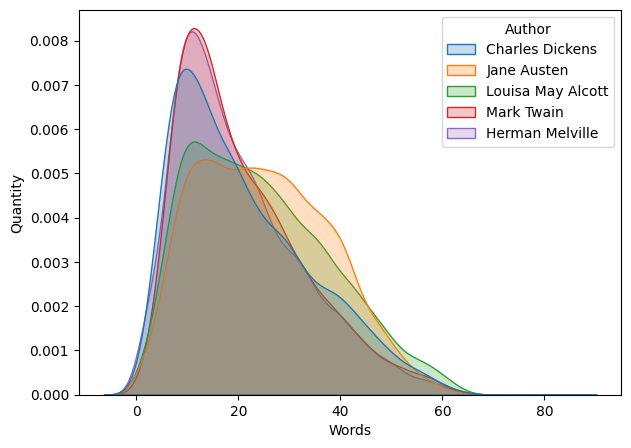

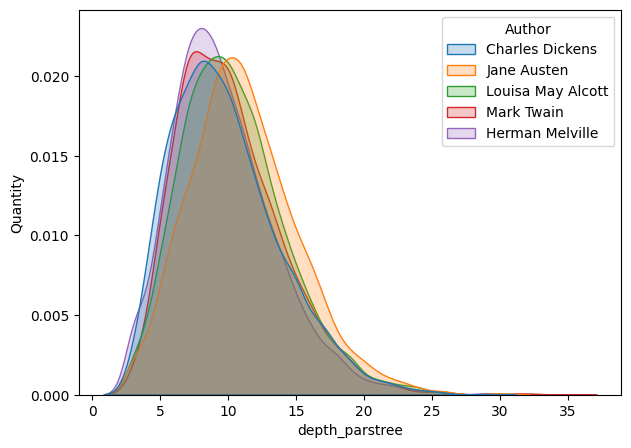

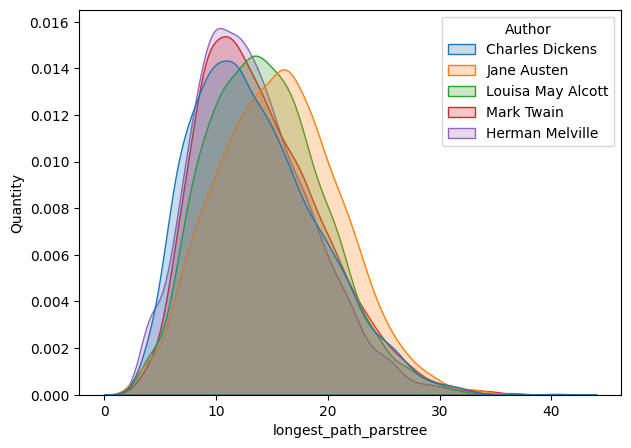

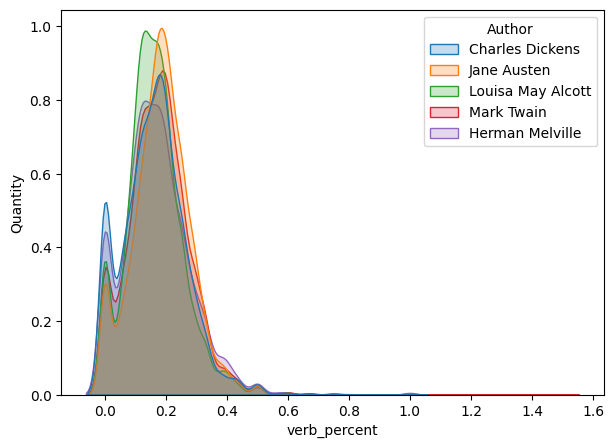

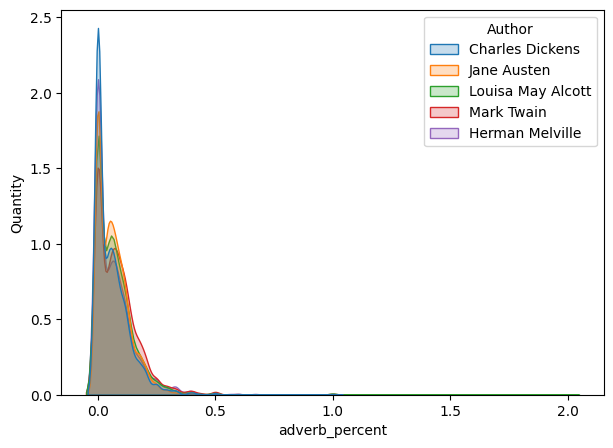

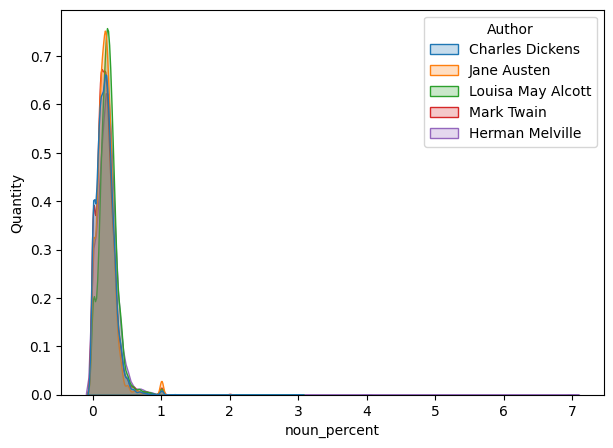

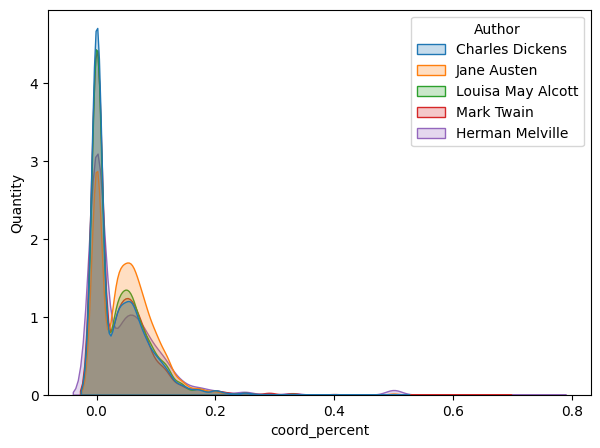

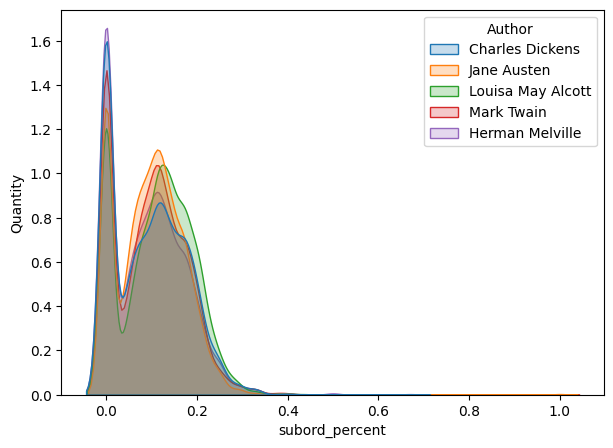

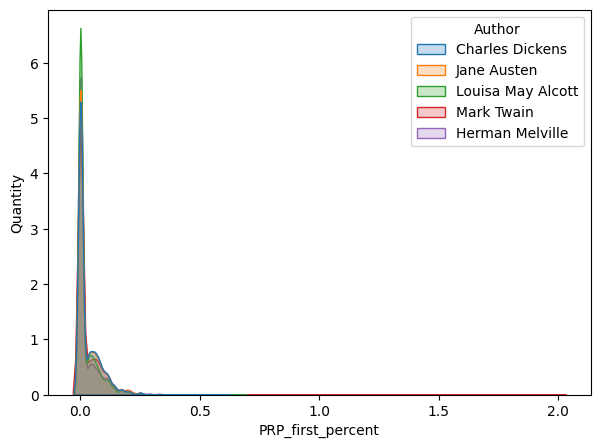

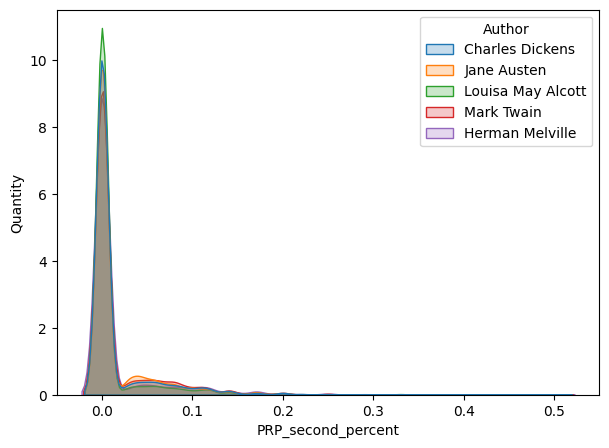

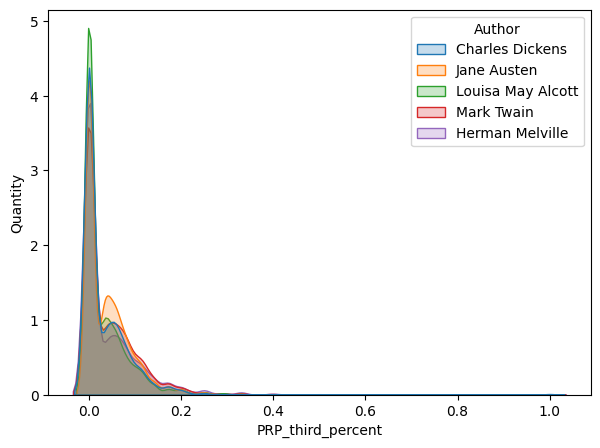

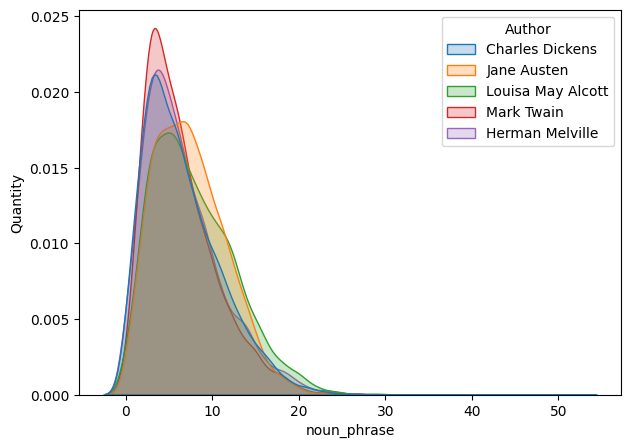

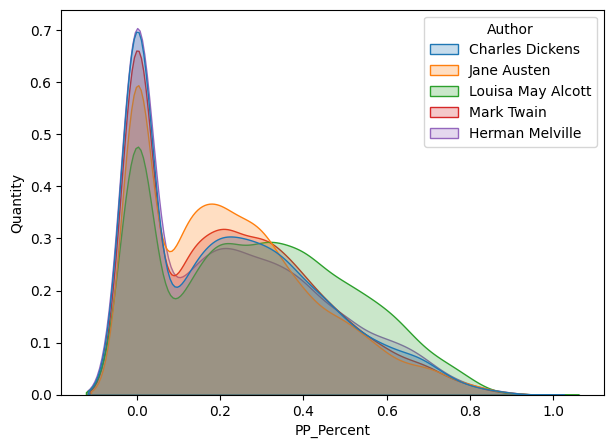

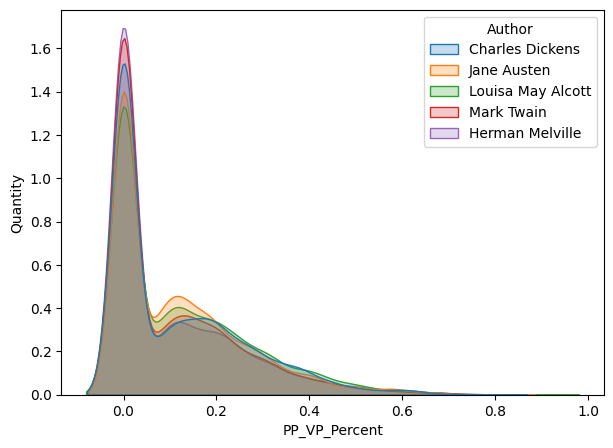

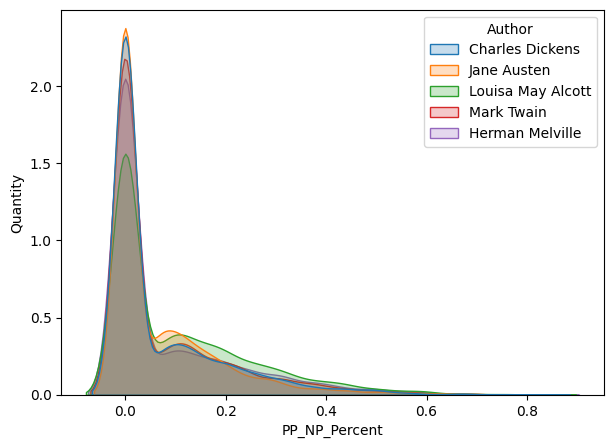

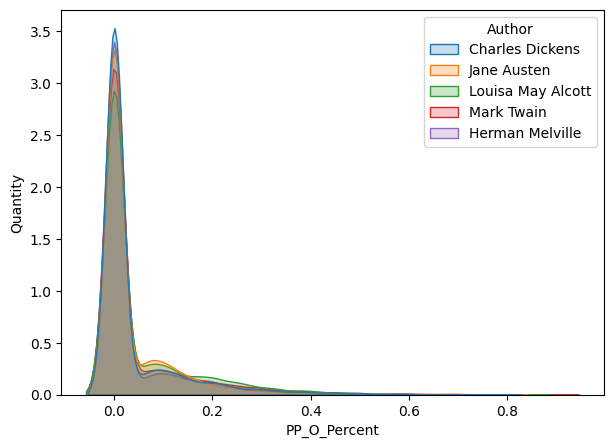

In [ ]:
print("Numerical Data: \n")

for col in columns_num:
    plt.figure(figsize=(7, 5))
    sns.kdeplot(data=Dataset,
                x=col,
                hue='Author',
                fill=True,
                hue_order=[
                    "Charles Dickens",
                    "Jane Austen",
                    "Louisa May Alcott",
                    "Mark Twain",
                    "Herman Melville"
                ])
    plt.title('')
    plt.xlabel(col)
    plt.ylabel('Quantity')
    plt.show()

Numerical Data: 



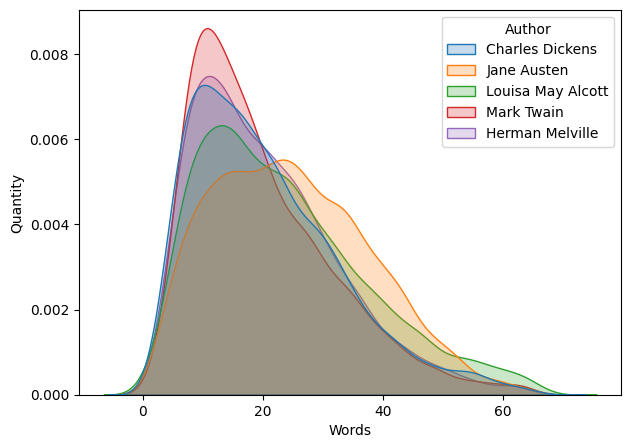

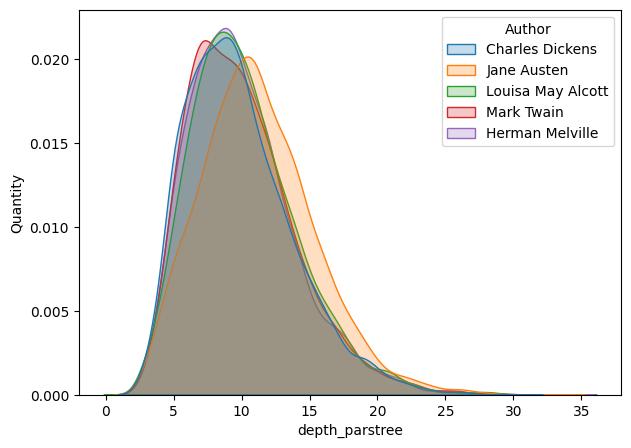

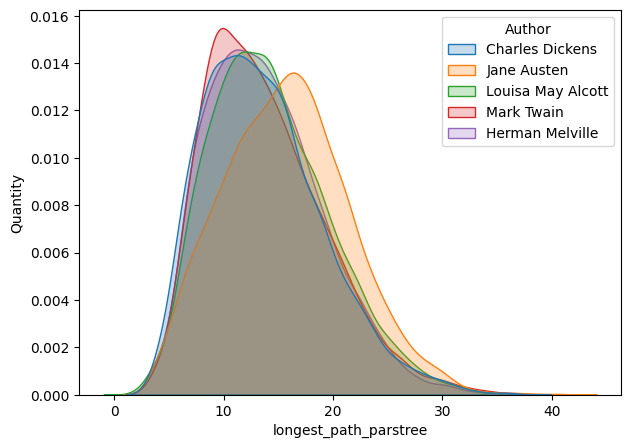

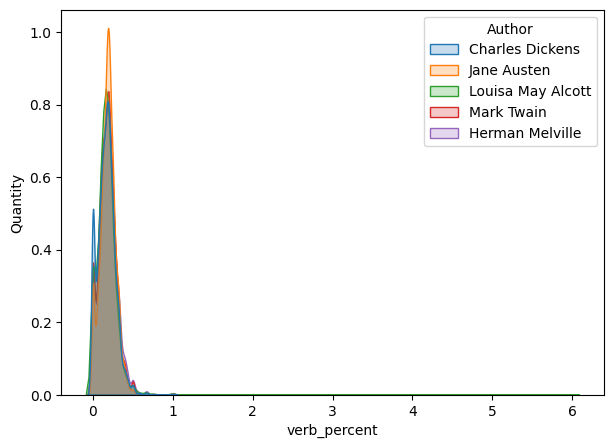

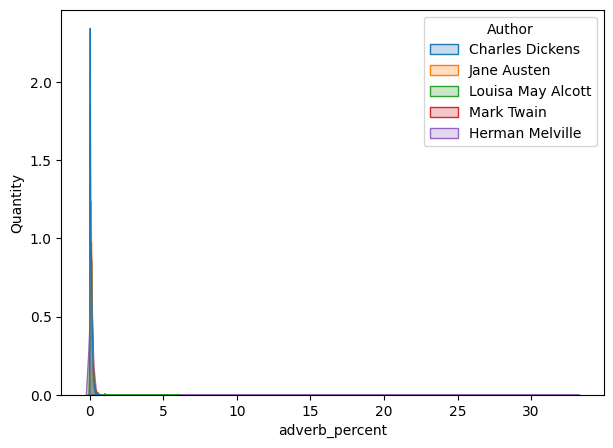

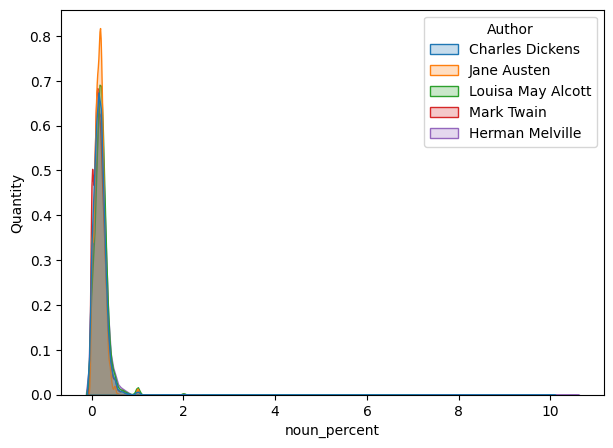

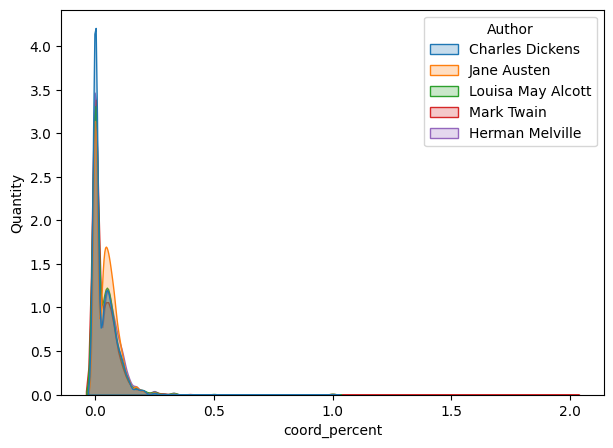

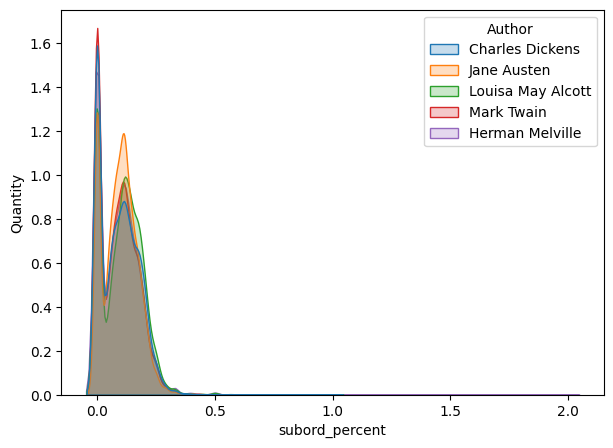

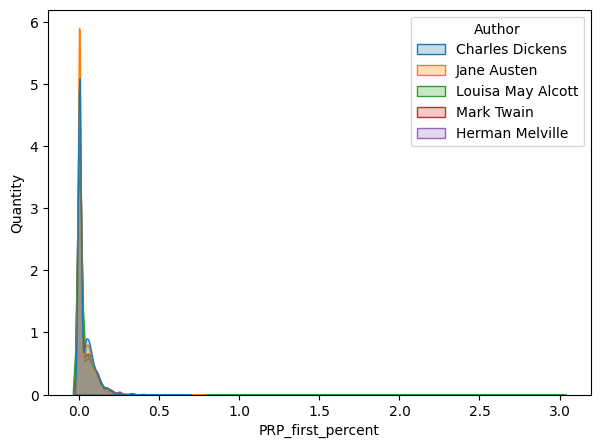

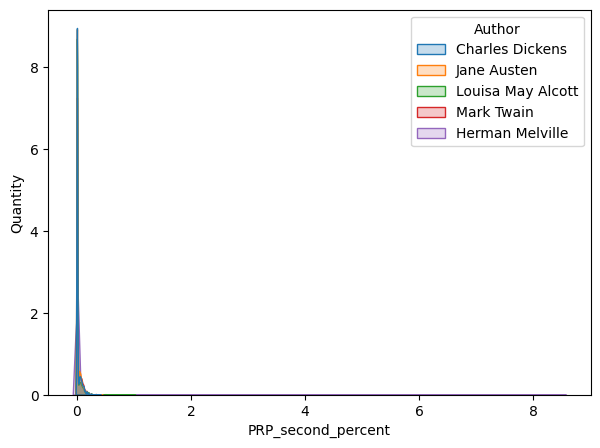

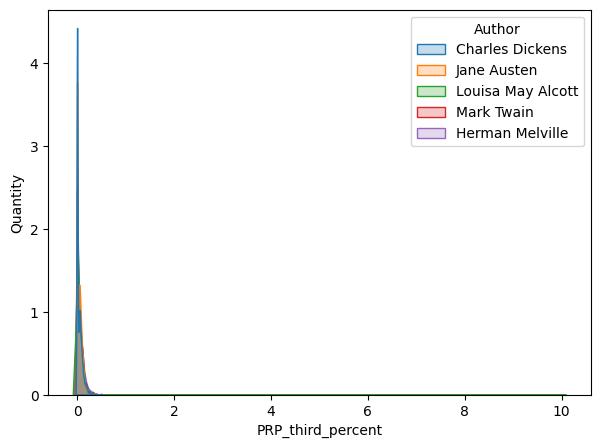

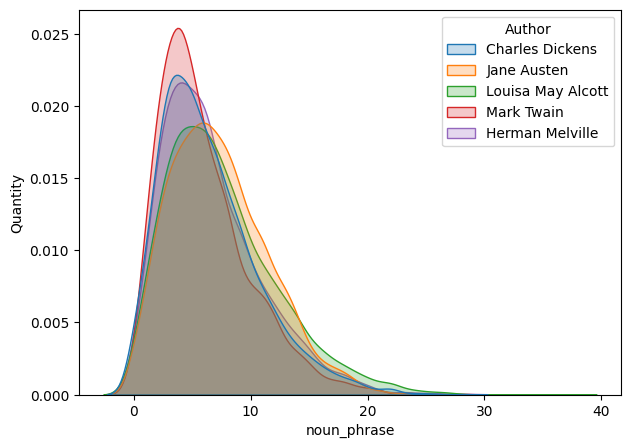

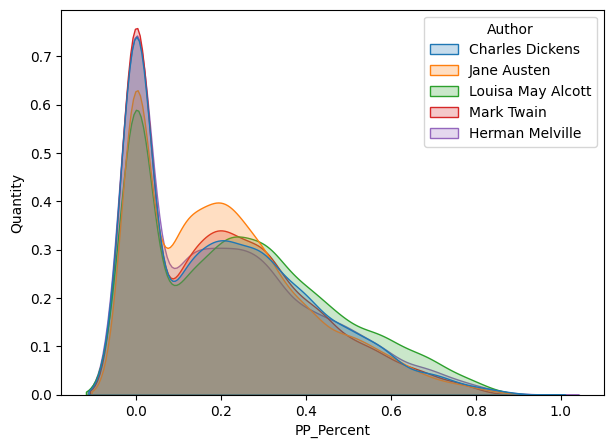

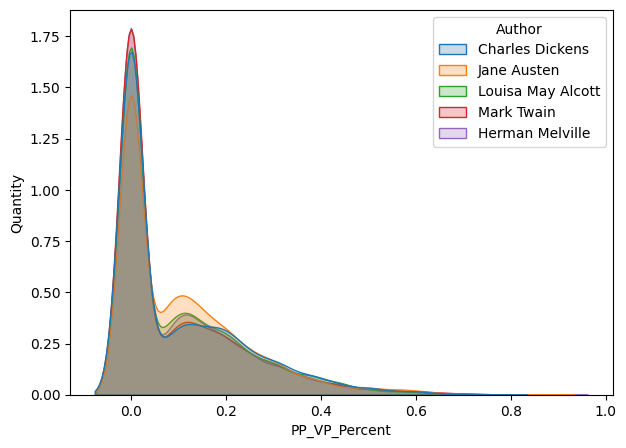

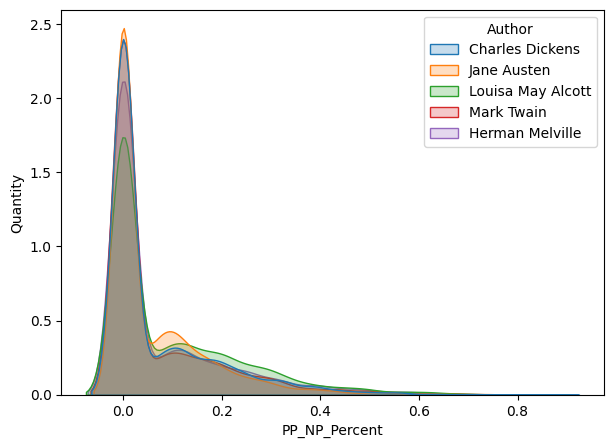

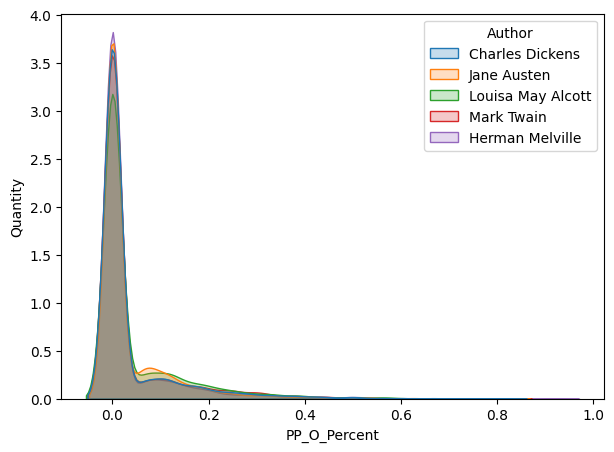

In [ ]:
print("Numerical Data: \n")

for col in columns_num:
    plt.figure(figsize=(7, 5))
    sns.kdeplot(data=Dataset_lora,
                x=col,
                hue='Author',
                fill=True,
                hue_order=[
                    "Charles Dickens",
                    "Jane Austen",
                    "Louisa May Alcott",
                    "Mark Twain",
                    "Herman Melville"
                ])
    plt.title('')
    plt.xlabel(col)
    plt.ylabel('Quantity')
    plt.show()

In [ ]:
"""print("\n Catgorical Data: \n")

for col in columns_cat:
    plt.figure(figsize=(7, 5))
    sns.histplot(data=Dataset, x=col, hue='Author', element='step', multiple='dodge')
    plt.title('')
    plt.xlabel(col)
    plt.ylabel('Quantity')
    plt.show()"""
pass